In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/parsed_chase.csv')
df.head()
# For easier data manipulation want the chaserWin not playerWin!
df["chaserWin"] = ~df["playerWin"]

## Win Rate by Chaser

First we want to visualise the win rates of each chaser, see if there are any variability between them

In [3]:
chasers_group = df[["Chaser","chaserWin"]].groupby("Chaser")
winrate_df = pd.DataFrame()
winrate_df["winRate"] = 100*chasers_group["chaserWin"].sum()/chasers_group["chaserWin"].count()
winrate_df["Chaser"] = chasers_group["chaserWin"].sum().index

# Just so we have an entry for average over all chasers
winrate_df = winrate_df.append({"Chaser": "All", "winRate" : 100*df["chaserWin"].sum()/df["chaserWin"].count()}, ignore_index=True)
#winrate_df[["Chaser", "winRate"]].head(10)
winrate_df.set_index("Chaser").head(10)

,winRate
Chaser,
Anne Hegerty,80.177515
Jenny Ryan,77.483444
Mark Labbett,75.667656
Paul Sinha,75.986842
Shaun Wallace,71.296296
All,75.997249


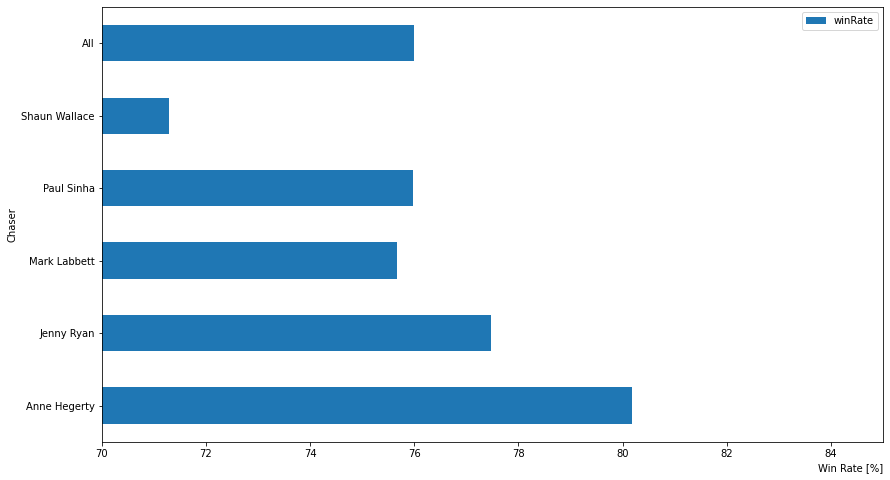

In [4]:
ax = winrate_df.plot(kind='barh', x="Chaser", y="winRate", xlim = [70,85], figsize=(14, 8))
plt.xlabel('Win Rate [%]', horizontalalignment='right', x=1.0)
plt.show()

What we can see is that 76% of episodes result in the chaser winning. The chaser with the highest win rate is Anne Hegerty with 80.2%, with Shaun Wallace falling with the lowest win rate of 71.3%.

So immediately it seems the chaser in the episode could be a useful variable in predicting whether the contestants can win or not.